In [274]:
import numpy as np
import pandas as pd
from graph_tool.all import *
import lingam
import matplotlib.pyplot as plt
import sys

from pathlib import Path
home = str(Path.home())
sys.path.append(home+"/climate_causal/utils/")
import PostPF

import importlib 

importlib.reload(PostPF)


<module 'PostPF' from '/global/homes/z/zhangtao/climate_causal/utils/PostPF.py'>

In [4]:
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

,x0,x1,x2,x3,x4,x5
0,2.729133,20.763940,6.015043,0.863160,16.657366,11.076392
1,2.092647,14.005753,3.719800,0.546553,13.106444,8.717559
2,2.113066,15.934349,4.598669,0.696022,12.807999,9.289795
3,0.231525,4.271926,1.327855,0.056888,1.415423,1.103395
4,2.844573,20.012749,5.611475,0.804459,17.227308,11.762575


<VertexPropertyMap object with value type 'unsigned long', for Graph 0x2aab09f9a640, at 0x2aab09f9afd0>


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aab09f9a640, at 0x2aab09f6a610>

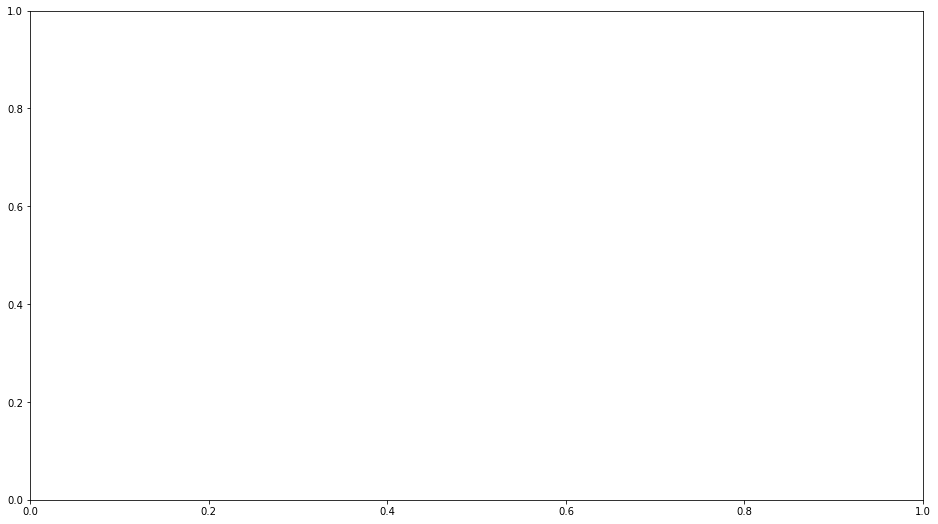

In [242]:
g = Graph()
v1 = g.add_vertex()
v2 = g.add_vertex()
e = g.add_edge(v1, v2)

print(g.vertex_index)
#graph_draw(g, vertex_text=g.vertex_index, output="two-nodes.pdf")
fig, axes = plt.subplots(1,1,figsize=(16,9))
graph_draw(g, vertex_text=g.vertex_index)

In [173]:
print(v1.out_degree())
print(e.source(), e.target())
print(type(e.source()))

1
0 1
<class 'graph_tool.libgraph_tool_core.Vertex'>


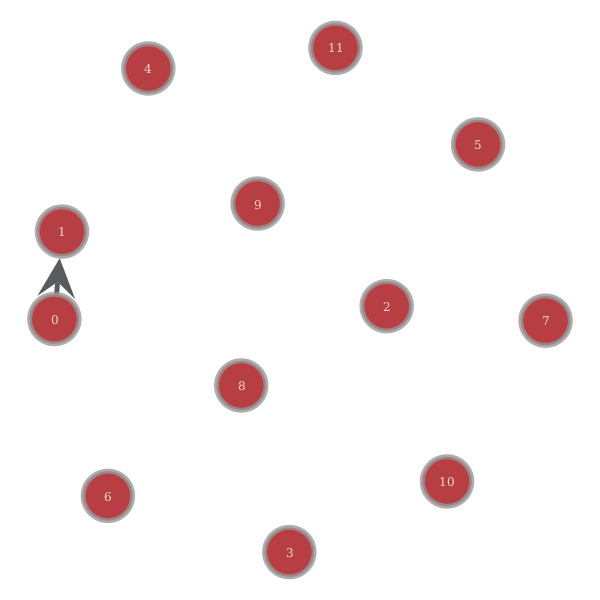

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf9c5e9d0, at 0x2aaaf9c4d760>

In [57]:
vlist = g.add_vertex(10)
graph_draw(g, vertex_text=g.vertex_index)

In [58]:
print(len(list(vlist)))
print(vlist)

10
<generator object Graph.add_vertex.<locals>.<genexpr> at 0x2aaafb51acf0>


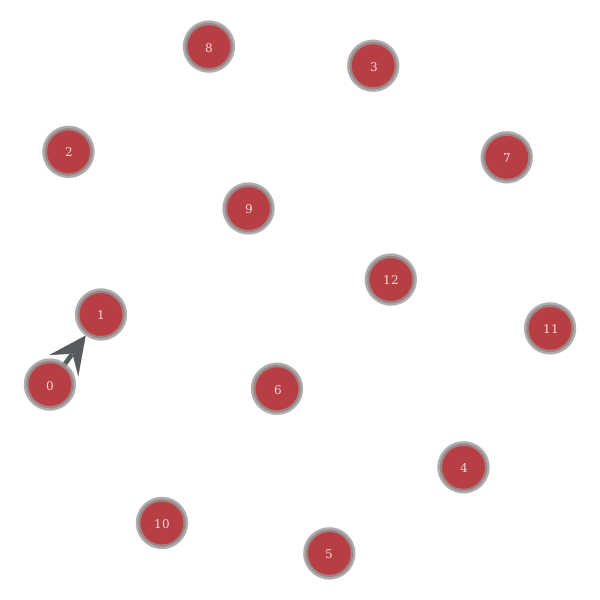

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf9c5e9d0, at 0x2aaaaebeb460>

In [59]:
v = g.add_vertex()
graph_draw(g, vertex_text=g.vertex_index)

In [60]:
print(g.vertex_index[v])
print(int(v))

12
12


In [61]:
#g.remove_edge(e)    
#g.remove_vertex(v2) 

8


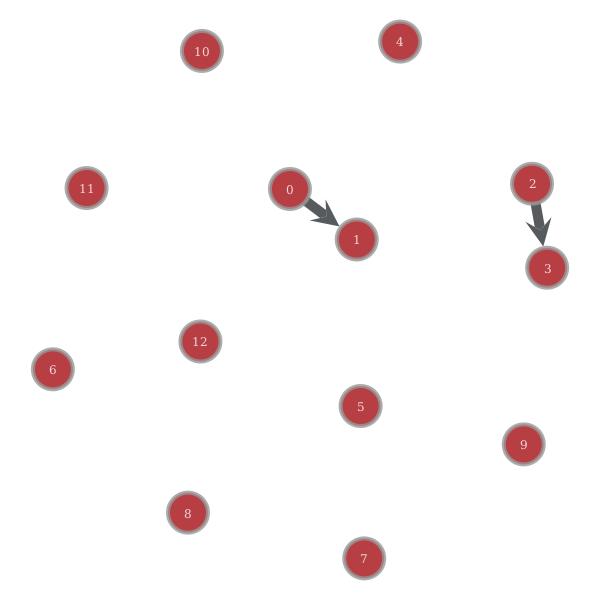

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf9c5e9d0, at 0x2aaaf8799a30>

In [62]:

v = g.vertex(8)
print(v)
g.add_edge(g.vertex(2), g.vertex(3))

size = 400
v_size = size/10
e_pwidth = v_size/4

graph_draw(g, vertex_text=g.vertex_index, vertex_size=v_size, edge_pen_width=e_pwidth)

In [23]:
for v in g.vertices():
    print(v)
for e in g.edges():
    print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
(0, 1)
(2, 3)


In [24]:
for v in g.vertices():
    for e in v.out_edges():
        print(e)
    for w in v.out_neighbors():
        print(w)

   # the edge and neighbors order always match
   for e, w in zip(v.out_edges(), v.out_neighbors()):
        assert e.target() == w

(0, 1)
1
(2, 3)
3


In [175]:
for v in g.iter_vertices():
    print(v)
for e in g.iter_edges():
    print(type(e))

0
1
<class 'list'>


In [27]:
#for v in g.iter_vertices():
#    for e in g.iter_out_edges(v):
#        print(e)
#    for w in g.iter_out_neighbors(v):
#        print(w)

In [28]:
print(g.get_out_degrees(g.get_vertices()))


[1 0 1 0 0 0 0 0 0 0 0 0 0]


In [29]:
edges = g.get_edges()
in_degs = g.get_in_degrees(g.get_vertices())
out_degs = g.get_out_degrees(g.get_vertices())
print((out_degs[edges[:,0]] * in_degs[edges[:,1]]).sum())


2


In [34]:
from numpy.random import randint,random

g = Graph()
g.add_vertex(100)

# insert some random links
for s,t in zip(randint(0, 100, 100), randint(0, 100, 100)):
    g.add_edge(g.vertex(s), g.vertex(t))

vprop_double = g.new_vertex_property("double")            # Double-precision floating point
v = g.vertex(10)
vprop_double[v] = 3.1416

vprop_vint = g.new_vertex_property("vector<int>")         # Vector of ints
v = g.vertex(40)
vprop_vint[v] = [1, 3, 42, 54]

eprop_dict = g.new_edge_property("object")                # Arbitrary Python object.
e = g.edges().next()
eprop_dict[e] = {"foo": "bar", "gnu": 42}                 # In this case, a dict.

gprop_bool = g.new_graph_property("bool")                 # Boolean
gprop_bool[g] = True

/global/homes/z/zhangtao/soft/miniconda3/envs/my_pytorch/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:637: UserWarning: Unknown parameter: figsize
  warnings.warn("Unknown parameter: " + k, UserWarning)


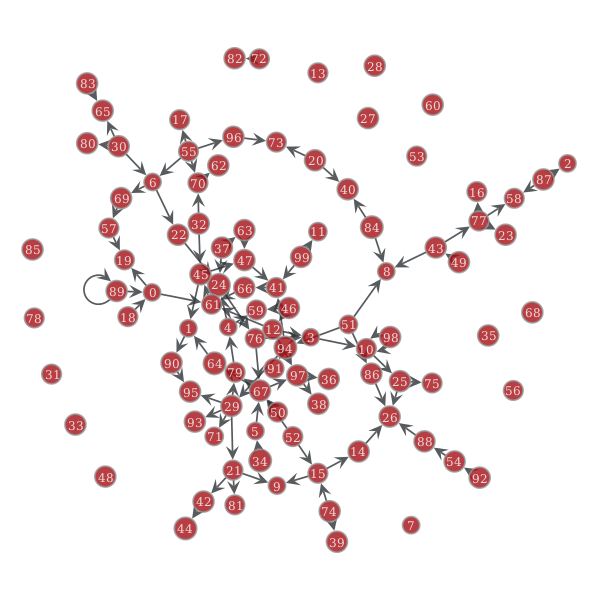

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf9c5e1c0, at 0x2aaae6da18b0>

In [32]:
graph_draw(g, vertex_text=g.vertex_index)

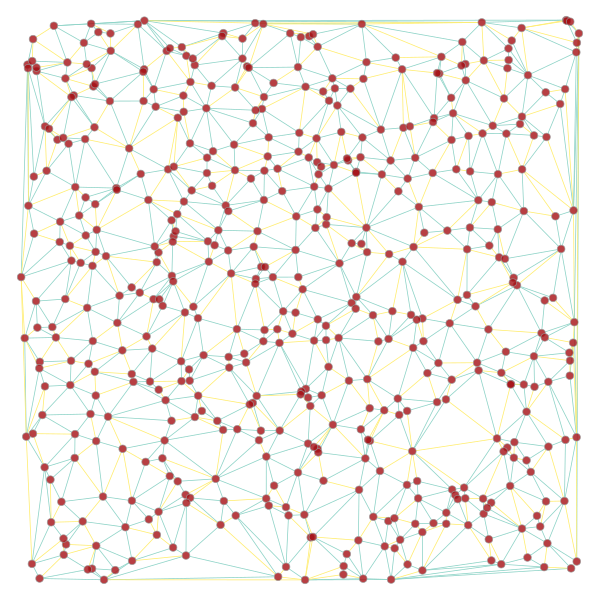

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf8799a30, at 0x2aaaf9c5e5b0>

In [35]:
g, pos = triangulation(random((500, 2)) * 4, type="delaunay")
tree = min_spanning_tree(g)
graph_draw(g, pos=pos, edge_color=tree)

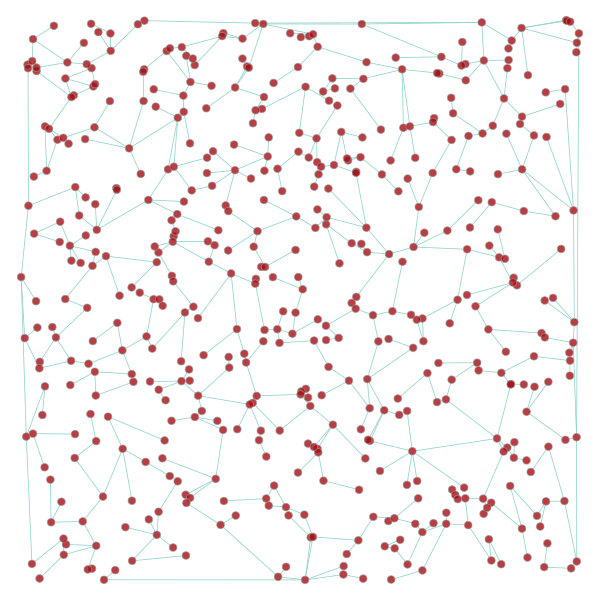

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf8799a30, at 0x2aaaf9c5e5b0>

In [36]:
g.set_edge_filter(tree)
graph_draw(g, pos=pos, edge_color=tree)

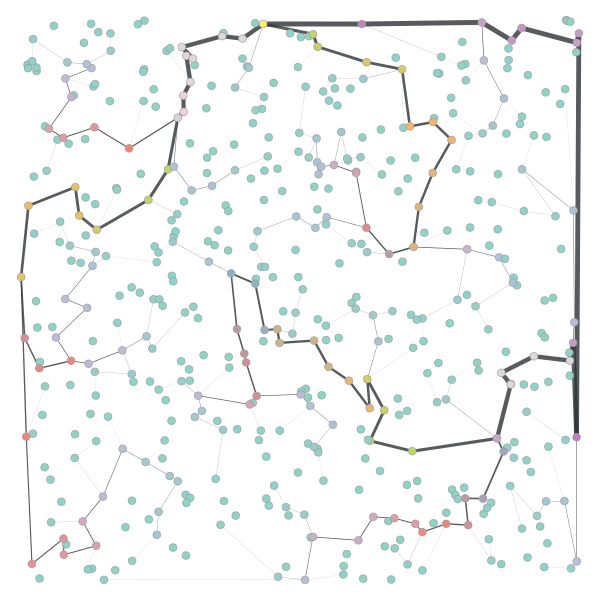

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf8799a30, at 0x2aaaf9c5e5b0>

In [37]:
bv, be = betweenness(g)
be.a /= be.a.max() / 5
graph_draw(g, pos=pos, vertex_fill_color=bv, edge_pen_width=be)

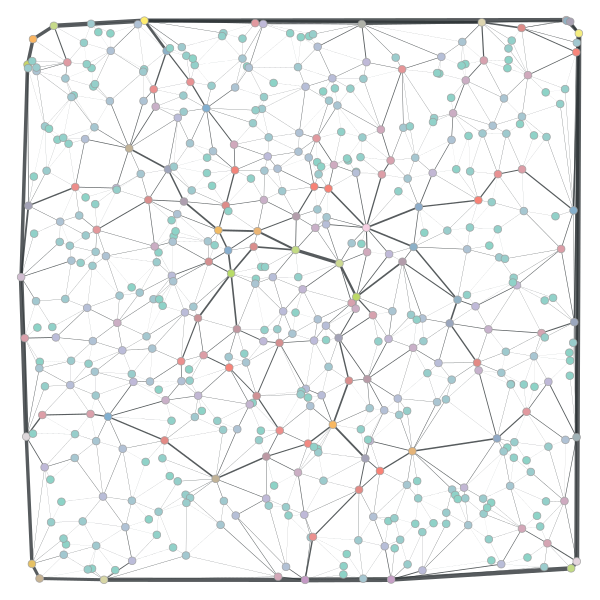

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf8799a30, at 0x2aaaf9c5e5b0>

In [38]:
g.set_edge_filter(None)
bv, be = betweenness(g)
be.a /= be.a.max() / 5
graph_draw(g, pos=pos, vertex_fill_color=bv, edge_pen_width=be)

[[3 0 0 1]
 [1 0 1 1]
 [1 1 0 1]
 [0 0 1 0]]


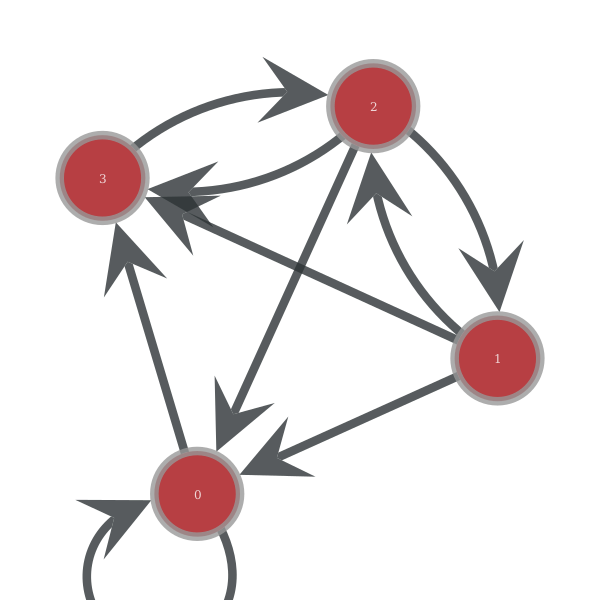

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaafb547b20, at 0x2aaafb536fd0>

In [143]:
import graph_tool as gt
import numpy as np
g = gt.Graph(directed=True)
adj = np.random.randint(0, 2, (4, 4))
adj[0,0] = 3.2
print(adj)
g.add_edge_list(np.transpose(adj.nonzero()))
graph_draw(g, vertex_text=g.vertex_index)

[[0 3 1]
 [0 1 0]
 [0 1 1]]


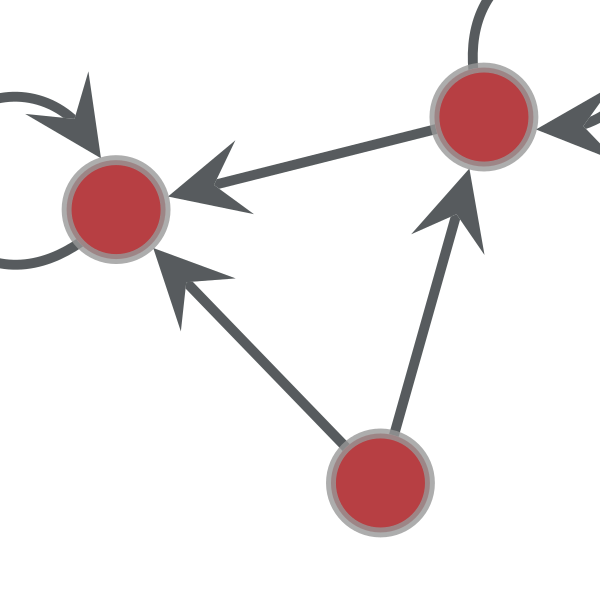

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf9c4dd00, at 0x2aaafb548f70>

In [130]:
import numpy
adj = numpy.random.randint(0, 2, (3, 3)) # a random directed graph
adj[0,1] = 3.4

print(adj)

idx = adj.nonzero()
weights = adj[idx]
g = Graph()
g.add_edge_list(np.transpose(idx))

#add weights as an edge propetyMap
ew = g.new_edge_property("double")
ew.a = weights 
g.ep['edge_weight'] = ew
graph_draw(g)

In [76]:
def to_graph_tool_slow(adj):
    g = gt.Graph(directed=False)
    edge_weights = g.new_edge_property('double')
    g.edge_properties['weight'] = edge_weights
    num_vertices = len(adj)
    for i in range(0,num_vertices):
        for j in range(i+1,num_vertices):
            if adj[i,j]!=0:
                e = g.add_edge(i,j)
                edge_weights[e] = adj[i,j]
    return g

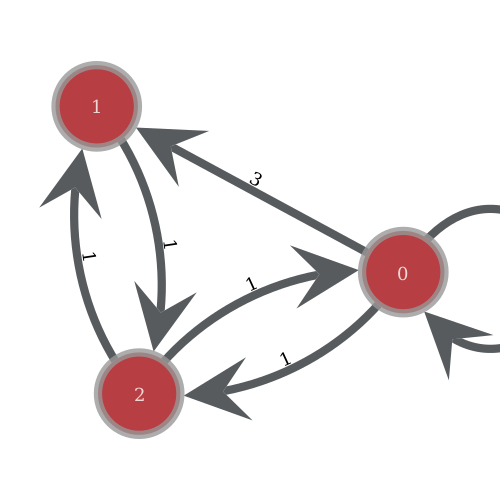

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaafb548190, at 0x2aaafb5476a0>

In [121]:
graph_draw(g, vertex_text=g.vertex_index, vertex_font_size=18, edge_text=ew, edge_font_size=18, output_size=(500, 500))

graph_draw(g, vertex_text=g.vertex_index, vertex_font_size=18, edge_text=ew, edge_font_size=18, output_size=(500, 500))

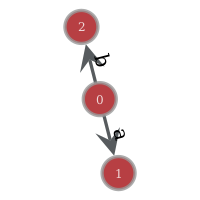

(0, 1)
0


TypeError: unsupported format string passed to Vertex.__format__

In [218]:
from graph_tool.all import *

g = Graph()
edge_labels = g.new_edge_property("string")
a = g.add_vertex()
b = g.add_vertex()
c = g.add_vertex()
e = g.add_edge(a, b)
f = g.add_edge(a,c)
edge_labels[e] = 'a'
edge_labels[f] = 'b'

props = {'text': edge_labels}
graph_draw(
    g,
    #eprops=props,
    vertex_text=g.vertex_index,
    output_size=(200, 200), edge_font_size=20,edge_text=edge_labels
)

print(e)
s =   "%d" % (e.source())
print(s)


In [136]:
edge_list = [(0, 1, .3, 10), (2, 3, .1, 0), (2, 0, .4, 42)]
g = gt.Graph()
eweight = g.new_ep("double")
elayer = g.new_ep("int")
g.add_edge_list(edge_list, eprops=[eweight, elayer])

print(eweight.__dict__)

{'_PropertyMap__map': <graph_tool.libgraph_tool_core.EdgePropertyMap<double> object at 0x2aaafb554ba0>, '_PropertyMap__g': <weakref at 0x2aaafb55bc70; to 'Graph' at 0x2aaafb547550>, '_PropertyMap__base_g': <weakref at 0x2aaafb55bc70; to 'Graph' at 0x2aaafb547550>, '_PropertyMap__key_type': 'e', '_PropertyMap__convert': <function _converter.<locals>.convert at 0x2aaafb550a60>}


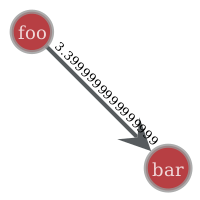

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaf9c4dd30, at 0x2aaaf9c4da60>

In [138]:
from graph_tool.all import *

g = Graph()

v1 = g.add_vertex()
v2 = g.add_vertex()

e = g.add_edge(v1, v2)

v_prop = g.new_vertex_property("string")
v_prop[v1] = 'foo'
v_prop[v2] = 'bar'

e_prop = g.new_edge_property("string")
e_prop[e] = 'e1'


e_prop = g.new_edge_property("double")
e_prop[e] = 3.4

graph_draw(g, vertex_text=v_prop,edge_text=e_prop, vertex_font_size=18, output_size=(200, 200))

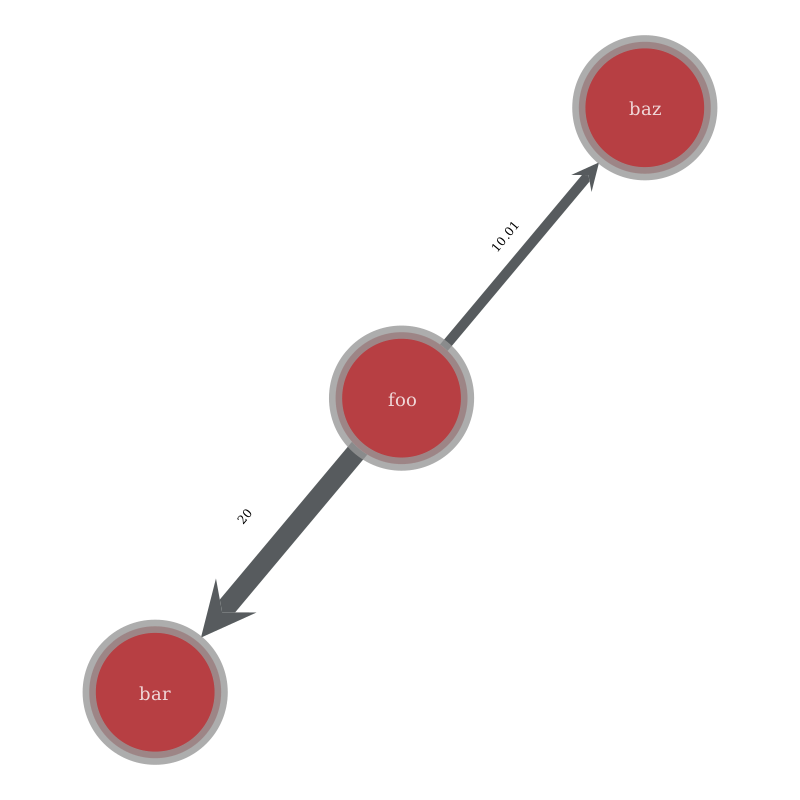

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaafb558070, at 0x2aaafb558400>

In [141]:
# https://stackoverflow.com/questions/24221792/graph-tool-draw-graph-with-user-defined-vertex-text/31209397
from graph_tool.all import *

g = Graph()

v1 = g.add_vertex()
v2 = g.add_vertex()
v3 = g.add_vertex()

e2 = g.add_edge(v1, v2)
e1 = g.add_edge(v1, v3)

v_prop = g.new_vertex_property("string")
v_prop[v1] = 'foo'
v_prop[v2] = 'bar'
v_prop[v3] = 'baz'

e_prop = g.new_edge_property("string")
e_prop[e1] = 'edge 1'
e_prop[e2] = 'edge 2'

e_len = g.new_edge_property("double")
e_len[e1] = 10.01
e_len[e2] = 20

#graph_draw(g, vertex_text=v_prop, edge_text=e_prop, edge_pen_width = e_len, vertex_font_size=18, output_size=(800, 800))
graph_draw(g, vertex_text=v_prop, edge_text=e_len, edge_pen_width = e_len, vertex_font_size=18, output_size=(800, 800))

[[ 0.          0.          0.02390893  2.84964495  0.          0.        ]
 [ 2.82608661  0.          1.94229456  0.13603784  0.          0.05044157]
 [ 0.          0.          0.          5.97626516  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 7.95659786  0.         -0.97657898  0.          0.          0.        ]
 [ 3.89626657  0.          0.          0.          0.          0.        ]]


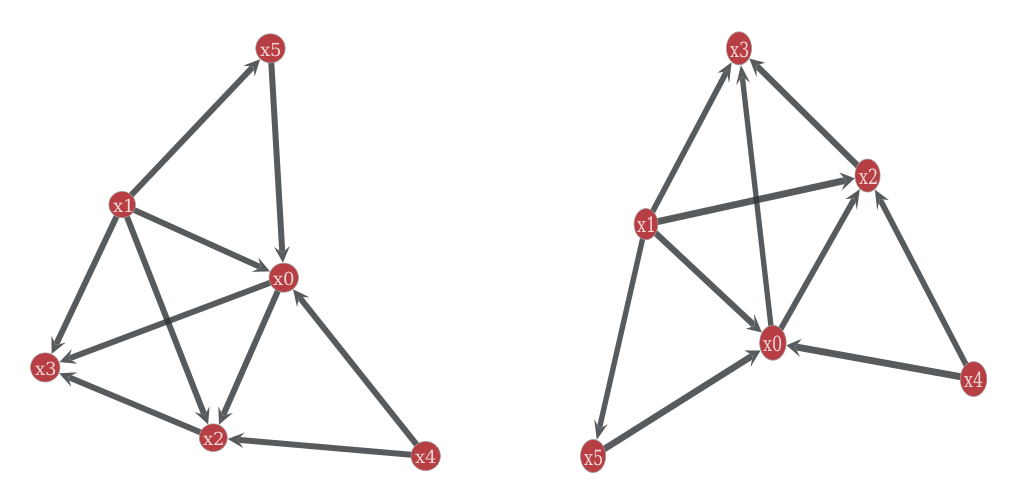

In [264]:
import graph_tool as gt
import numpy as np

def create_graph_by_adjmatrix(adj, directed=True, show_weight=True, axes=None):
    g = gt.Graph(directed=directed)
    g.add_edge_list(np.transpose(np.array(adj).nonzero()))
    
    v_prop = g.new_vertex_property("string")
    for v,name in zip(g.vertices(),adj.columns):
        v_prop[v] = name
        
    e_prob = g.new_edge_property("string")
    for e in g.edges():
        start =   int("%d" % (e.source()))
        end = int("%d" % (e.target()))
        e_prob[e] = "%.2f" % (adj.iloc[start,end])
    
    if axes is not None:
        axes.axis('off')
    
    if show_weight == True:
        graph_draw(g, vertex_text=v_prop, edge_text=e_prob, vertex_font_size=18, 
                   edge_font_size=14, edge_pen_width=6, mplfig=axes)
    else:
        graph_draw(g, vertex_text=v_prop, vertex_font_size=18, 
                   edge_pen_width=6, mplfig=axes)
    
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

model = lingam.DirectLiNGAM()
model.fit(X)
adj = model.adjacency_matrix_
print(adj)

adj_pd = pd.DataFrame(adj,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

fig, axes = plt.subplots(1,2,figsize=(18,9))
create_graph_by_adjmatrix(adj_pd, show_weight=False, axes=axes[0])
create_graph_by_adjmatrix(adj_pd, show_weight=False, axes=axes[1])


In [273]:
PostPF.create_graph_by_adjmatrix(adj_pd, show_weight=False)

AttributeError: module 'graph_tool' has no attribute 'graph_draw'

In [162]:
aa = (1,0)
bb = adj_pd.iloc[aa]
print(bb)

2.8267736318729058


In [196]:
e

<invalid Edge object at 0x2aab095d2d30>

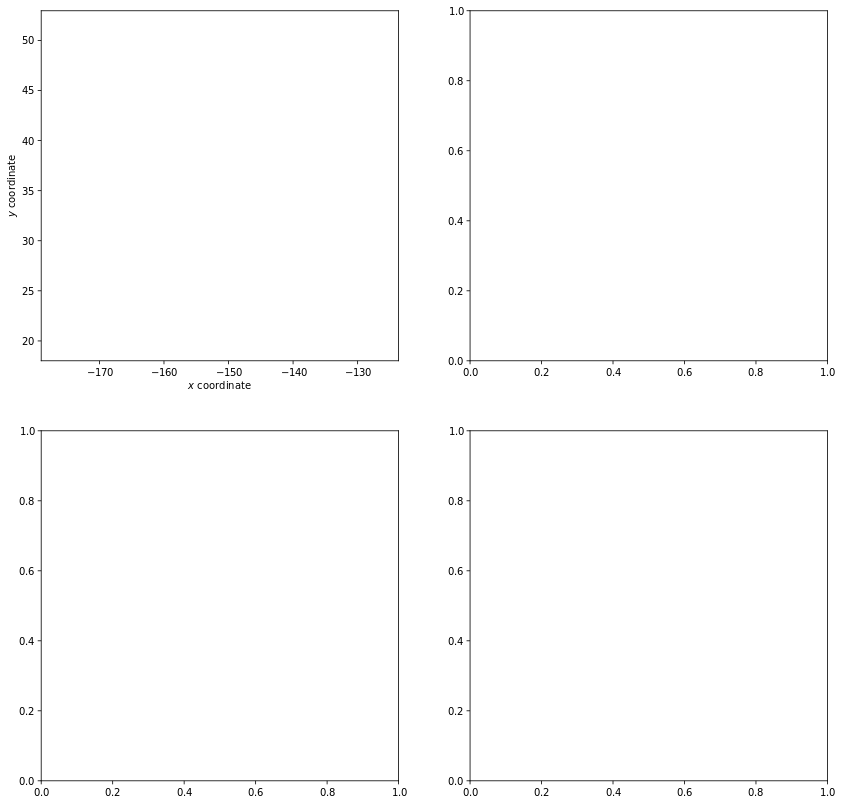

In [246]:
import graph_tool.all as gt
import matplotlib.pyplot as plt

#plt.switch_backend("cairo")

fig, ax = plt.subplots(2, 2, figsize=(12, 11.5))

g = gt.collection.data["polbooks"]

gt.graph_draw(g, g.vp.pos, vertex_size=1.5, mplfig=ax[0,0])

ax[0,0].set_xlabel("$x$ coordinate")
ax[0,0].set_ylabel("$y$ coordinate")

plt.subplots_adjust(left=0.08, right=0.99, top=0.99, bottom=0.06)
#fig.savefig("gt-mpl.pdf")